In [10]:
import pandas as pd
import os

In [11]:
df=pd.read_csv("./sales/Sales_April_2019.csv")
files=[file for file in os.listdir('./sales')]
all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv("./sales/"+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("all_data.csv",index=False)

In [12]:
all_data=pd.read_csv('all_data.csv')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

In [13]:
all_data.shape

(186850, 6)

In [14]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data=all_data.dropna(how='all')
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001

find or and delete it

In [15]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head(3)

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

convert columns to the correct type

In [16]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

augment data with additional columns

In [17]:
all_data['month']=all_data['Order Date'].str[0:2]
all_data['month']=all_data['month'].astype('int32')
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4

add a sales column

In [18]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month   sales  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99

add a city column

In [19]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['city']=all_data['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  month   sales  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4   23.90   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4   99.99   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4   11.99   

              city  
0        Dallas TX  
2        Boston MA  
3   Los Angeles CA  
4   Los Angeles CA  
5   Los Angeles CA

what was the best month for sales? how much was earned that month

In [20]:
results=all_data.groupby('month').sum()

C:\Users\o876\AppData\Local\Temp\ipykernel_14004\1025416296.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=all_data.groupby('month').sum()


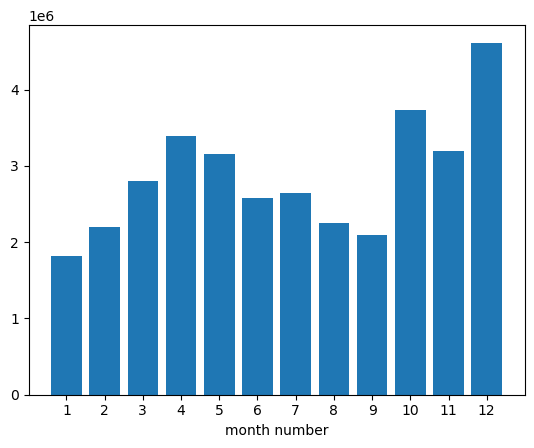

In [21]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,results['sales'])
plt.xticks(months)
plt.ylabel=('sales in usd ($)')
plt.xlabel('month number')
plt.show()

what city had the highest number of sales

In [22]:
results =all_data.groupby('city').sum()
results

C:\Users\o876\AppData\Local\Temp\ipykernel_14004\2867246483.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results =all_data.groupby('city').sum()


Quantity Ordered  Price Each   month       sales
city                                                               
 Atlanta GA                   16602  2779908.20  104794  2795498.58
 Austin TX                    11153  1809873.61   69829  1819581.75
 Boston MA                    22528  3637409.77  141112  3661642.01
 Dallas TX                    16730  2752627.82  104620  2767975.40
 Los Angeles CA               33289  5421435.23  208325  5452570.80
 New York City NY             27932  4635370.83  175741  4664317.43
 Portland ME                   2750   447189.25   17144   449758.27
 Portland OR                  11303  1860558.22   70621  1870732.34
 San Francisco CA             50239  8211461.74  315520  8262203.91
 Seattle WA                   16553  2733296.01  104941  2747755.48

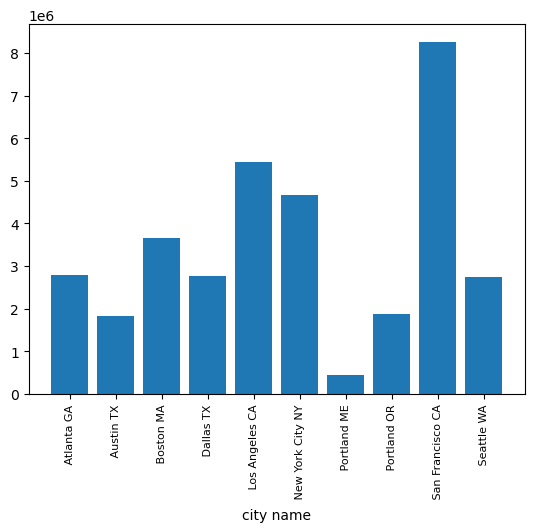

In [23]:
import matplotlib.pyplot as plt
cities= [city for city,df in all_data.groupby('city')]
plt.bar(cities,results['sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel=('sales in usd ($)')
plt.xlabel('city name')
plt.show()

what time should we display advertisements to maximise likelihood of customers buying product

In [24]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [25]:
all_data['hour']=all_data['Order Date'].dt.hour
all_data['minute']=all_data['Order Date'].dt.minute
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  month   sales  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   23.90   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   99.99   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  600.00   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   11.99   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   11.99   

              city  hour  minute  
0        Dallas TX     8      46  
2        Boston MA    22      30  
3   Los Angeles CA    14      38  
4   Los Angeles CA    14      38  
5   Los Angeles CA     9      27

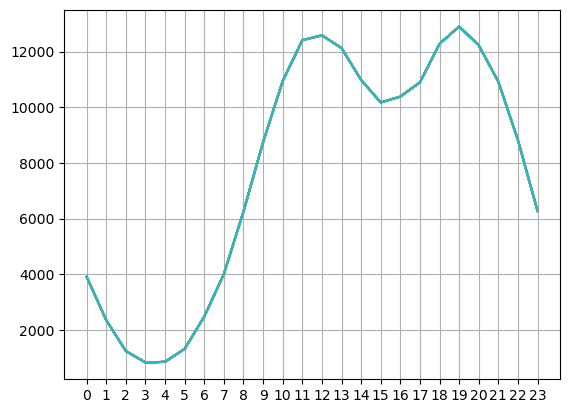

In [27]:
hours =[hour for hour, df in all_data.groupby('hour')]
plt.plot(hours, all_data.groupby(['hour']).count())
#all_data.groupby(['hour']).count()
plt.xticks(hours)
plt.grid()
plt.show()

what products are most often sold together

In [28]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','grouped']].drop_duplicates()
df.head()

C:\Users\o876\AppData\Local\Temp\ipykernel_14004\3912310947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Order ID                                            grouped
3     176560                      Google Phone,Wired Headphones
18    176574                  Google Phone,USB-C Charging Cable
30    176585  Bose SoundSport Headphones,Bose SoundSport Hea...
32    176586                AAA Batteries (4-pack),Google Phone
119   176672      Lightning Charging Cable,USB-C Charging Cable

In [29]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in df['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

    for key,value in count.most_common(10):
        print(key,value)

('Google Phone', 'Wired Headphones') 1
('Google Phone', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable') 1
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1
('Google Phone', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable') 1
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1
('AAA Batteries (4-pack)', 'Google Phone') 1
('Google Phone', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable') 1
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1
('AAA Batteries (4-pack)', 'Google Phone') 1
('Lightning Charging Cable', 'USB-C Charging Cable') 1
('Google Phone', 'Wired Headphones') 1
('Google Phone', 'USB-C Charging Cable') 1
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 1
('AAA Batteries (4-pack)', 'Google Phone') 1
('Lightning Charging Cable', 'USB-C Charging Cable') 1
('Apple Airpods Headphones', 'ThinkPad Laptop') 1
('Go

('Google Phone', 'Wired Headphones') 23
('iPhone', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable') 19
('Google Phone', 'Bose SoundSport Headphones') 12
('Vareebadd Phone', 'Wired Headphones') 10
('USB-C Charging Cable', 'Wired Headphones') 6
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 6
('iPhone', 'Lightning Charging Cable') 65
('Google Phone', 'USB-C Charging Cable') 63
('Google Phone', 'Wired Headphones') 24
('iPhone', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones') 19
('Vareebadd Phone', 'USB-C Charging Cable') 19
('Google Phone', 'Bose SoundSport Headphones') 12
('Vareebadd Phone', 'Wired Headphones') 10
('USB-C Charging Cable', 'Wired Headphones') 6
('AA Batteries (4-pack)', 'Apple Airpods Headphones') 6
('iPhone', 'Lightning Charging Cable') 65
('Google Phone', 'USB-C Charging Cable') 63
('Google Phone', 'Wired Headphones') 24
('iPhone', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones

('iPhone', 'Lightning Charging Cable') 239
('Google Phone', 'USB-C Charging Cable') 238
('iPhone', 'Wired Headphones') 104
('Google Phone', 'Wired Headphones') 95
('iPhone', 'Apple Airpods Headphones') 87
('Vareebadd Phone', 'USB-C Charging Cable') 83
('Google Phone', 'Bose SoundSport Headphones') 48
('USB-C Charging Cable', 'Wired Headphones') 38
('Vareebadd Phone', 'Wired Headphones') 35
('Vareebadd Phone', 'Bose SoundSport Headphones') 23
('iPhone', 'Lightning Charging Cable') 239
('Google Phone', 'USB-C Charging Cable') 238
('iPhone', 'Wired Headphones') 104
('Google Phone', 'Wired Headphones') 95
('iPhone', 'Apple Airpods Headphones') 87
('Vareebadd Phone', 'USB-C Charging Cable') 83
('Google Phone', 'Bose SoundSport Headphones') 48
('USB-C Charging Cable', 'Wired Headphones') 38
('Vareebadd Phone', 'Wired Headphones') 35
('Vareebadd Phone', 'Bose SoundSport Headphones') 23
('iPhone', 'Lightning Charging Cable') 239
('Google Phone', 'USB-C Charging Cable') 238
('iPhone', 'Wired He

('Google Phone', 'USB-C Charging Cable') 271
('iPhone', 'Lightning Charging Cable') 269
('iPhone', 'Wired Headphones') 121
('Google Phone', 'Wired Headphones') 114
('iPhone', 'Apple Airpods Headphones') 108
('Vareebadd Phone', 'USB-C Charging Cable') 103
('Google Phone', 'Bose SoundSport Headphones') 58
('USB-C Charging Cable', 'Wired Headphones') 46
('Vareebadd Phone', 'Wired Headphones') 39
('Vareebadd Phone', 'Bose SoundSport Headphones') 25
('Google Phone', 'USB-C Charging Cable') 271
('iPhone', 'Lightning Charging Cable') 269
('iPhone', 'Wired Headphones') 121
('Google Phone', 'Wired Headphones') 114
('iPhone', 'Apple Airpods Headphones') 108
('Vareebadd Phone', 'USB-C Charging Cable') 103
('Google Phone', 'Bose SoundSport Headphones') 58
('USB-C Charging Cable', 'Wired Headphones') 46
('Vareebadd Phone', 'Wired Headphones') 39
('Vareebadd Phone', 'Bose SoundSport Headphones') 25
('Google Phone', 'USB-C Charging Cable') 271
('iPhone', 'Lightning Charging Cable') 269
('iPhone', 'Wi

('Google Phone', 'USB-C Charging Cable') 316
('iPhone', 'Lightning Charging Cable') 306
('iPhone', 'Wired Headphones') 145
('Google Phone', 'Wired Headphones') 133
('iPhone', 'Apple Airpods Headphones') 126
('Vareebadd Phone', 'USB-C Charging Cable') 114
('Google Phone', 'Bose SoundSport Headphones') 68
('USB-C Charging Cable', 'Wired Headphones') 52
('Vareebadd Phone', 'Wired Headphones') 45
('Vareebadd Phone', 'Bose SoundSport Headphones') 29
('Google Phone', 'USB-C Charging Cable') 316
('iPhone', 'Lightning Charging Cable') 306
('iPhone', 'Wired Headphones') 145
('Google Phone', 'Wired Headphones') 133
('iPhone', 'Apple Airpods Headphones') 126
('Vareebadd Phone', 'USB-C Charging Cable') 114
('Google Phone', 'Bose SoundSport Headphones') 68
('USB-C Charging Cable', 'Wired Headphones') 52
('Vareebadd Phone', 'Wired Headphones') 45
('Vareebadd Phone', 'Bose SoundSport Headphones') 29
('Google Phone', 'USB-C Charging Cable') 316
('iPhone', 'Lightning Charging Cable') 306
('iPhone', 'Wi

('Google Phone', 'USB-C Charging Cable') 366
('iPhone', 'Lightning Charging Cable') 338
('iPhone', 'Wired Headphones') 167
('Google Phone', 'Wired Headphones') 151
('iPhone', 'Apple Airpods Headphones') 141
('Vareebadd Phone', 'USB-C Charging Cable') 134
('Google Phone', 'Bose SoundSport Headphones') 82
('USB-C Charging Cable', 'Wired Headphones') 59
('Vareebadd Phone', 'Wired Headphones') 59
('Vareebadd Phone', 'Bose SoundSport Headphones') 31
('Google Phone', 'USB-C Charging Cable') 367
('iPhone', 'Lightning Charging Cable') 338
('iPhone', 'Wired Headphones') 167
('Google Phone', 'Wired Headphones') 151
('iPhone', 'Apple Airpods Headphones') 141
('Vareebadd Phone', 'USB-C Charging Cable') 134
('Google Phone', 'Bose SoundSport Headphones') 82
('USB-C Charging Cable', 'Wired Headphones') 59
('Vareebadd Phone', 'Wired Headphones') 59
('Vareebadd Phone', 'Bose SoundSport Headphones') 31
('Google Phone', 'USB-C Charging Cable') 368
('iPhone', 'Lightning Charging Cable') 338
('iPhone', 'Wi

('iPhone', 'Apple Airpods Headphones') 151
('Vareebadd Phone', 'USB-C Charging Cable') 147
('Google Phone', 'Bose SoundSport Headphones') 86
('USB-C Charging Cable', 'Wired Headphones') 69
('Vareebadd Phone', 'Wired Headphones') 62
('Vareebadd Phone', 'Bose SoundSport Headphones') 33
('Google Phone', 'USB-C Charging Cable') 413
('iPhone', 'Lightning Charging Cable') 377
('iPhone', 'Wired Headphones') 195
('Google Phone', 'Wired Headphones') 175
('iPhone', 'Apple Airpods Headphones') 151
('Vareebadd Phone', 'USB-C Charging Cable') 147
('Google Phone', 'Bose SoundSport Headphones') 86
('USB-C Charging Cable', 'Wired Headphones') 69
('Vareebadd Phone', 'Wired Headphones') 62
('Vareebadd Phone', 'Bose SoundSport Headphones') 33
('Google Phone', 'USB-C Charging Cable') 414
('iPhone', 'Lightning Charging Cable') 377
('iPhone', 'Wired Headphones') 195
('Google Phone', 'Wired Headphones') 175
('iPhone', 'Apple Airpods Headphones') 151
('Vareebadd Phone', 'USB-C Charging Cable') 147
('Google Ph

('Google Phone', 'USB-C Charging Cable') 456
('iPhone', 'Lightning Charging Cable') 420
('iPhone', 'Wired Headphones') 209
('Google Phone', 'Wired Headphones') 202
('iPhone', 'Apple Airpods Headphones') 167
('Vareebadd Phone', 'USB-C Charging Cable') 165
('Google Phone', 'Bose SoundSport Headphones') 94
('USB-C Charging Cable', 'Wired Headphones') 85
('Vareebadd Phone', 'Wired Headphones') 71
('USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Google Phone', 'USB-C Charging Cable') 456
('iPhone', 'Lightning Charging Cable') 421
('iPhone', 'Wired Headphones') 209
('Google Phone', 'Wired Headphones') 202
('iPhone', 'Apple Airpods Headphones') 167
('Vareebadd Phone', 'USB-C Charging Cable') 165
('Google Phone', 'Bose SoundSport Headphones') 94
('USB-C Charging Cable', 'Wired Headphones') 85
('Vareebadd Phone', 'Wired Headphones') 71
('USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Google Phone', 'USB-C Charging Cable') 456
('iPhone', 'Lightning Charging Cable') 421
('iP

('USB-C Charging Cable', 'Wired Headphones') 91
('Vareebadd Phone', 'Wired Headphones') 76
('USB-C Charging Cable', 'Bose SoundSport Headphones') 41
('Google Phone', 'USB-C Charging Cable') 513
('iPhone', 'Lightning Charging Cable') 485
('iPhone', 'Wired Headphones') 230
('Google Phone', 'Wired Headphones') 215
('Vareebadd Phone', 'USB-C Charging Cable') 192
('iPhone', 'Apple Airpods Headphones') 182
('Google Phone', 'Bose SoundSport Headphones') 102
('USB-C Charging Cable', 'Wired Headphones') 91
('Vareebadd Phone', 'Wired Headphones') 76
('USB-C Charging Cable', 'Bose SoundSport Headphones') 41
('Google Phone', 'USB-C Charging Cable') 513
('iPhone', 'Lightning Charging Cable') 485
('iPhone', 'Wired Headphones') 230
('Google Phone', 'Wired Headphones') 215
('Vareebadd Phone', 'USB-C Charging Cable') 192
('iPhone', 'Apple Airpods Headphones') 182
('Google Phone', 'Bose SoundSport Headphones') 102
('USB-C Charging Cable', 'Wired Headphones') 91
('Vareebadd Phone', 'Wired Headphones') 76

('USB-C Charging Cable', 'Bose SoundSport Headphones') 43
('Google Phone', 'USB-C Charging Cable') 554
('iPhone', 'Lightning Charging Cable') 548
('iPhone', 'Wired Headphones') 252
('Google Phone', 'Wired Headphones') 237
('iPhone', 'Apple Airpods Headphones') 206
('Vareebadd Phone', 'USB-C Charging Cable') 204
('Google Phone', 'Bose SoundSport Headphones') 114
('USB-C Charging Cable', 'Wired Headphones') 96
('Vareebadd Phone', 'Wired Headphones') 84
('USB-C Charging Cable', 'Bose SoundSport Headphones') 43
('Google Phone', 'USB-C Charging Cable') 555
('iPhone', 'Lightning Charging Cable') 548
('iPhone', 'Wired Headphones') 252
('Google Phone', 'Wired Headphones') 237
('iPhone', 'Apple Airpods Headphones') 206
('Vareebadd Phone', 'USB-C Charging Cable') 204
('Google Phone', 'Bose SoundSport Headphones') 114
('USB-C Charging Cable', 'Wired Headphones') 96
('Vareebadd Phone', 'Wired Headphones') 84
('USB-C Charging Cable', 'Bose SoundSport Headphones') 43
('Google Phone', 'USB-C Charging

('Vareebadd Phone', 'USB-C Charging Cable') 225
('Google Phone', 'Bose SoundSport Headphones') 129
('USB-C Charging Cable', 'Wired Headphones') 105
('Vareebadd Phone', 'Wired Headphones') 93
('Lightning Charging Cable', 'Wired Headphones') 49
('Google Phone', 'USB-C Charging Cable') 614
('iPhone', 'Lightning Charging Cable') 610
('iPhone', 'Wired Headphones') 271
('Google Phone', 'Wired Headphones') 255
('iPhone', 'Apple Airpods Headphones') 226
('Vareebadd Phone', 'USB-C Charging Cable') 225
('Google Phone', 'Bose SoundSport Headphones') 129
('USB-C Charging Cable', 'Wired Headphones') 105
('Vareebadd Phone', 'Wired Headphones') 93
('Lightning Charging Cable', 'Wired Headphones') 49
('Google Phone', 'USB-C Charging Cable') 615
('iPhone', 'Lightning Charging Cable') 610
('iPhone', 'Wired Headphones') 271
('Google Phone', 'Wired Headphones') 255
('iPhone', 'Apple Airpods Headphones') 226
('Vareebadd Phone', 'USB-C Charging Cable') 225
('Google Phone', 'Bose SoundSport Headphones') 129
(

('USB-C Charging Cable', 'Wired Headphones') 109
('Vareebadd Phone', 'Wired Headphones') 101
('Lightning Charging Cable', 'Wired Headphones') 54
('iPhone', 'Lightning Charging Cable') 667
('Google Phone', 'USB-C Charging Cable') 662
('iPhone', 'Wired Headphones') 290
('Google Phone', 'Wired Headphones') 272
('iPhone', 'Apple Airpods Headphones') 237
('Vareebadd Phone', 'USB-C Charging Cable') 237
('Google Phone', 'Bose SoundSport Headphones') 143
('USB-C Charging Cable', 'Wired Headphones') 110
('Vareebadd Phone', 'Wired Headphones') 101
('Lightning Charging Cable', 'Wired Headphones') 54
('iPhone', 'Lightning Charging Cable') 667
('Google Phone', 'USB-C Charging Cable') 662
('iPhone', 'Wired Headphones') 290
('Google Phone', 'Wired Headphones') 272
('iPhone', 'Apple Airpods Headphones') 237
('Vareebadd Phone', 'USB-C Charging Cable') 237
('Google Phone', 'Bose SoundSport Headphones') 143
('USB-C Charging Cable', 'Wired Headphones') 110
('Vareebadd Phone', 'Wired Headphones') 101
('Lig

('iPhone', 'Lightning Charging Cable') 700
('Google Phone', 'USB-C Charging Cable') 697
('iPhone', 'Wired Headphones') 300
('Google Phone', 'Wired Headphones') 284
('Vareebadd Phone', 'USB-C Charging Cable') 250
('iPhone', 'Apple Airpods Headphones') 246
('Google Phone', 'Bose SoundSport Headphones') 150
('USB-C Charging Cable', 'Wired Headphones') 113
('Vareebadd Phone', 'Wired Headphones') 104
('Lightning Charging Cable', 'Wired Headphones') 55
('iPhone', 'Lightning Charging Cable') 700
('Google Phone', 'USB-C Charging Cable') 697
('iPhone', 'Wired Headphones') 301
('Google Phone', 'Wired Headphones') 284
('Vareebadd Phone', 'USB-C Charging Cable') 250
('iPhone', 'Apple Airpods Headphones') 246
('Google Phone', 'Bose SoundSport Headphones') 150
('USB-C Charging Cable', 'Wired Headphones') 113
('Vareebadd Phone', 'Wired Headphones') 104
('Lightning Charging Cable', 'Wired Headphones') 55
('iPhone', 'Lightning Charging Cable') 700
('Google Phone', 'USB-C Charging Cable') 697
('iPhone',

('Google Phone', 'Bose SoundSport Headphones') 156
('USB-C Charging Cable', 'Wired Headphones') 121
('Vareebadd Phone', 'Wired Headphones') 111
('USB-C Charging Cable', 'Bose SoundSport Headphones') 59
('iPhone', 'Lightning Charging Cable') 754
('Google Phone', 'USB-C Charging Cable') 729
('iPhone', 'Wired Headphones') 326
('Google Phone', 'Wired Headphones') 300
('Vareebadd Phone', 'USB-C Charging Cable') 262
('iPhone', 'Apple Airpods Headphones') 261
('Google Phone', 'Bose SoundSport Headphones') 156
('USB-C Charging Cable', 'Wired Headphones') 121
('Vareebadd Phone', 'Wired Headphones') 111
('USB-C Charging Cable', 'Bose SoundSport Headphones') 59
('iPhone', 'Lightning Charging Cable') 754
('Google Phone', 'USB-C Charging Cable') 729
('iPhone', 'Wired Headphones') 326
('Google Phone', 'Wired Headphones') 300
('iPhone', 'Apple Airpods Headphones') 262
('Vareebadd Phone', 'USB-C Charging Cable') 262
('Google Phone', 'Bose SoundSport Headphones') 156
('USB-C Charging Cable', 'Wired Hea

('iPhone', 'Lightning Charging Cable') 812
('Google Phone', 'USB-C Charging Cable') 784
('iPhone', 'Wired Headphones') 347
('Google Phone', 'Wired Headphones') 320
('iPhone', 'Apple Airpods Headphones') 285
('Vareebadd Phone', 'USB-C Charging Cable') 276
('Google Phone', 'Bose SoundSport Headphones') 168
('USB-C Charging Cable', 'Wired Headphones') 129
('Vareebadd Phone', 'Wired Headphones') 113
('Lightning Charging Cable', 'Wired Headphones') 65
('iPhone', 'Lightning Charging Cable') 812
('Google Phone', 'USB-C Charging Cable') 784
('iPhone', 'Wired Headphones') 347
('Google Phone', 'Wired Headphones') 320
('iPhone', 'Apple Airpods Headphones') 285
('Vareebadd Phone', 'USB-C Charging Cable') 276
('Google Phone', 'Bose SoundSport Headphones') 168
('USB-C Charging Cable', 'Wired Headphones') 129
('Vareebadd Phone', 'Wired Headphones') 113
('Lightning Charging Cable', 'Wired Headphones') 65
('iPhone', 'Lightning Charging Cable') 812
('Google Phone', 'USB-C Charging Cable') 784
('iPhone',

('iPhone', 'Lightning Charging Cable') 864
('Google Phone', 'USB-C Charging Cable') 843
('iPhone', 'Wired Headphones') 370
('Google Phone', 'Wired Headphones') 347
('iPhone', 'Apple Airpods Headphones') 308
('Vareebadd Phone', 'USB-C Charging Cable') 305
('Google Phone', 'Bose SoundSport Headphones') 177
('USB-C Charging Cable', 'Wired Headphones') 137
('Vareebadd Phone', 'Wired Headphones') 124
('Lightning Charging Cable', 'Wired Headphones') 72
('iPhone', 'Lightning Charging Cable') 864
('Google Phone', 'USB-C Charging Cable') 843
('iPhone', 'Wired Headphones') 370
('Google Phone', 'Wired Headphones') 347
('iPhone', 'Apple Airpods Headphones') 308
('Vareebadd Phone', 'USB-C Charging Cable') 305
('Google Phone', 'Bose SoundSport Headphones') 177
('USB-C Charging Cable', 'Wired Headphones') 137
('Vareebadd Phone', 'Wired Headphones') 124
('Lightning Charging Cable', 'Wired Headphones') 72
('iPhone', 'Lightning Charging Cable') 864
('Google Phone', 'USB-C Charging Cable') 843
('iPhone',

('iPhone', 'Lightning Charging Cable') 904
('Google Phone', 'USB-C Charging Cable') 878
('iPhone', 'Wired Headphones') 398
('Google Phone', 'Wired Headphones') 378
('iPhone', 'Apple Airpods Headphones') 325
('Vareebadd Phone', 'USB-C Charging Cable') 324
('Google Phone', 'Bose SoundSport Headphones') 200
('USB-C Charging Cable', 'Wired Headphones') 148
('Vareebadd Phone', 'Wired Headphones') 135
('Lightning Charging Cable', 'Wired Headphones') 77
('iPhone', 'Lightning Charging Cable') 904
('Google Phone', 'USB-C Charging Cable') 878
('iPhone', 'Wired Headphones') 398
('Google Phone', 'Wired Headphones') 378
('iPhone', 'Apple Airpods Headphones') 325
('Vareebadd Phone', 'USB-C Charging Cable') 324
('Google Phone', 'Bose SoundSport Headphones') 200
('USB-C Charging Cable', 'Wired Headphones') 148
('Vareebadd Phone', 'Wired Headphones') 135
('Lightning Charging Cable', 'Wired Headphones') 77
('iPhone', 'Lightning Charging Cable') 904
('Google Phone', 'USB-C Charging Cable') 878
('iPhone',

('Google Phone', 'Wired Headphones') 394
('Vareebadd Phone', 'USB-C Charging Cable') 339
('iPhone', 'Apple Airpods Headphones') 336
('Google Phone', 'Bose SoundSport Headphones') 208
('USB-C Charging Cable', 'Wired Headphones') 151
('Vareebadd Phone', 'Wired Headphones') 137
('Lightning Charging Cable', 'Wired Headphones') 82
('iPhone', 'Lightning Charging Cable') 939
('Google Phone', 'USB-C Charging Cable') 910
('iPhone', 'Wired Headphones') 416
('Google Phone', 'Wired Headphones') 394
('Vareebadd Phone', 'USB-C Charging Cable') 339
('iPhone', 'Apple Airpods Headphones') 336
('Google Phone', 'Bose SoundSport Headphones') 208
('USB-C Charging Cable', 'Wired Headphones') 151
('Vareebadd Phone', 'Wired Headphones') 137
('Lightning Charging Cable', 'Wired Headphones') 82
('iPhone', 'Lightning Charging Cable') 939
('Google Phone', 'USB-C Charging Cable') 910
('iPhone', 'Wired Headphones') 416
('Google Phone', 'Wired Headphones') 394
('Vareebadd Phone', 'USB-C Charging Cable') 339
('iPhone'

('Vareebadd Phone', 'USB-C Charging Cable') 350
('Google Phone', 'Bose SoundSport Headphones') 213
('USB-C Charging Cable', 'Wired Headphones') 156
('Vareebadd Phone', 'Wired Headphones') 139
('Lightning Charging Cable', 'Wired Headphones') 88
('iPhone', 'Lightning Charging Cable') 970
('Google Phone', 'USB-C Charging Cable') 955
('iPhone', 'Wired Headphones') 430
('Google Phone', 'Wired Headphones') 404
('iPhone', 'Apple Airpods Headphones') 355
('Vareebadd Phone', 'USB-C Charging Cable') 350
('Google Phone', 'Bose SoundSport Headphones') 213
('USB-C Charging Cable', 'Wired Headphones') 156
('Vareebadd Phone', 'Wired Headphones') 139
('Lightning Charging Cable', 'Wired Headphones') 88
('iPhone', 'Lightning Charging Cable') 970
('Google Phone', 'USB-C Charging Cable') 955
('iPhone', 'Wired Headphones') 430
('Google Phone', 'Wired Headphones') 405
('iPhone', 'Apple Airpods Headphones') 355
('Vareebadd Phone', 'USB-C Charging Cable') 350
('Google Phone', 'Bose SoundSport Headphones') 213

what product sold the most and why

C:\Users\o876\AppData\Local\Temp\ipykernel_14004\1540988738.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered=product_group.sum()['Quantity Ordered']


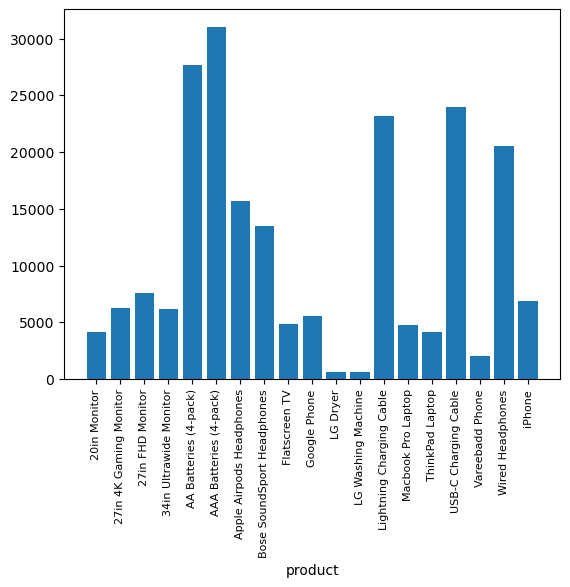

In [30]:
product_group = all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
products=[product for product, df in product_group]
plt.bar(products,quantity_ordered)
#plt.ylabel('quantity')
plt.xlabel('product')
plt.xticks(products,rotation='vertical',size=8)
plt.show()


C:\Users\o876\AppData\Local\Temp\ipykernel_14004\3518220789.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


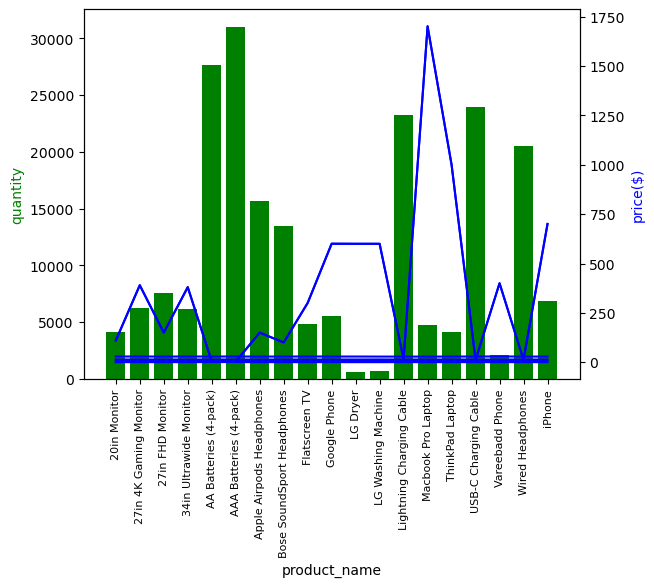

In [31]:
prices=all_data.groupby('Product').mean(['Price Each'])
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('product_name')
ax1.set_ylabel('quantity',color='g')
ax2.set_ylabel('price($)',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)

plt.show()